# Scipy-stats Project
***

## Table of Contents
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- <br>


## Introduction
***

I am an introduuuuuuuuuuuctioooooooon.......

## The null hypothesis
***

blablabla

In [234]:
# Numerical arrays.
import numpy as np

# Dataframes.
import pandas as pd

# Plots.
import matplotlib.pyplot as plt

# More aesthetic plots.
import seaborn as sns

# Statistics.
import scipy.stats as ss

# Set default plot size.
plt.rcParams['figure.figsize'] = (12, 8)

# Set default plot style.
plt.style.use("ggplot")

In [268]:
# Load the blood pressure dataset from its URL with pandas.
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv")


### Descriptive analytics
***

In [269]:
# View basic information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [272]:
# View the first few rows.
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [273]:
# Check for any null values.
df.isnull().count()

patient      120
sex          120
agegrp       120
bp_before    120
bp_after     120
dtype: int64

The result shows there are no null values in the dataset.

In [275]:
# View descriptive statistics.
df.describe()

,patient,bp_before,bp_after
count,120.000000,120.000000,120.000000
mean,60.500000,156.450000,151.358333
std,34.785054,11.389845,14.177622
min,1.000000,138.000000,125.000000
25%,30.750000,147.000000,140.750000
50%,60.500000,154.500000,149.500000
75%,90.250000,164.000000,161.000000
max,120.000000,185.000000,185.000000


The points of interest here are the columns bp_before and bp_after. This data will potentiallu provide useful information about the efficacy of the drug.

### Visualise the data
***

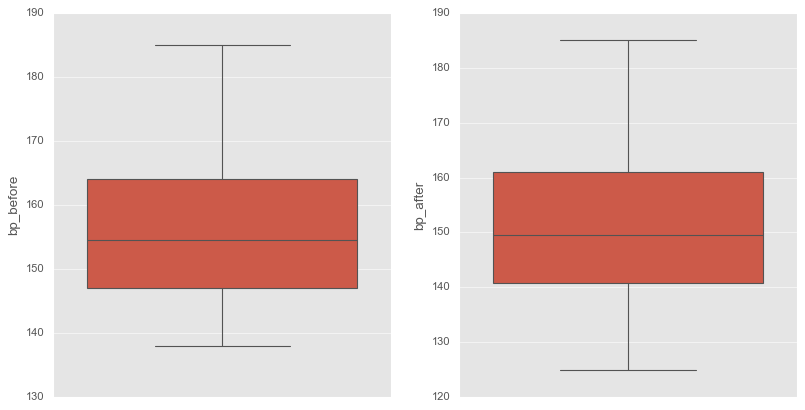

In [241]:
plt.rcParams['figure.figsize'] = (12, 6)
fig, ax = plt.subplots(1, 2)

sns.set_style("darkgrid")
sns.boxplot(ax=ax[0], data=df, y=df["bp_before"])
sns.boxplot(ax=ax[1], data=df, y=df["bp_after"]);

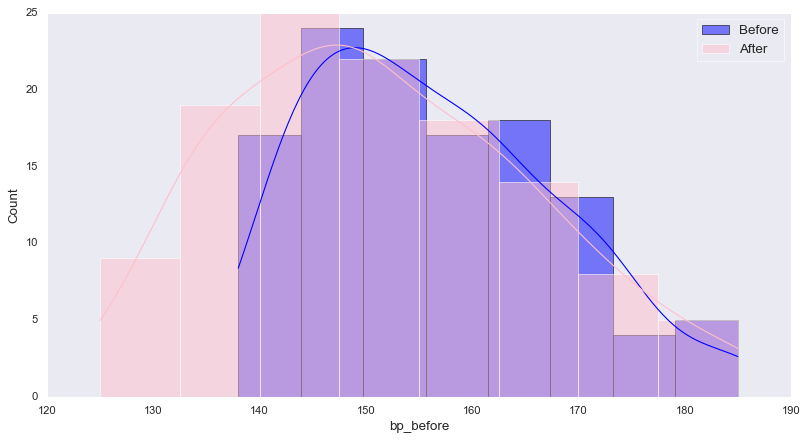

In [262]:
sns.histplot(x=df["bp_before"], kde=True, color="blue", edgecolor="black", label="Before")
sns.histplot(x=df["bp_after"], kde=True, color="pink", label="After")
plt.legend();


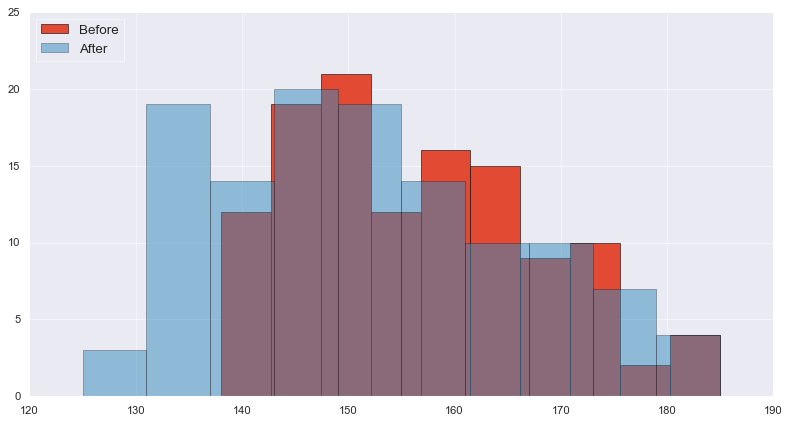

In [245]:
fig, ax = plt.subplots()
sns.set_style("dark")

ax.hist(df["bp_before"], alpha=1, edgecolor="black", label="Before")
ax.hist(df["bp_after"], alpha=0.5, edgecolor="black", label="After")
plt.legend(loc="upper left");

## T test with scipy.stats
[Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
***

([Recommended read by Ian](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php))

#### Function & parameters:
`scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)`

In [281]:
t_ss, p_ss = ss.ttest_ind(df['bp_before'], df['bp_after'])
print(f"t-value: {t_ss}\tp-value: {p_ss}")
print(f"P_scipy: {p_ss:0.2f}")

t-value: 3.0669836819036274	p-value: 0.002412277478078891
P_scipy: 0.00


The p-value is 0.002 which is a statistically significant.

From [Investopedia](https://www.investopedia.com/terms/p/p-value.asp):
- What Is P-Value?
In statistics, the p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct. The p-value is used as an alternative to rejection points to provide the smallest level of significance at which the null hypothesis would be rejected. A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis.


***
#### Next:
- Maybe test male & female's seperately - could then plot data.
- Do: Levene's test of homogeneity of variances - to check if there are high levels of variance which can lead to incorrect assumptions.